In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
I = pd.read_excel('IPL Raw Data.xlsx')
I

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR -B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.000000,0,307,15,20.466667,8.898551,13.933333,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.000000,0,29,0,0.000000,14.500000,0.000000,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.014493,5,1059,29,36.517241,8.810316,24.896552,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.315789,0,1125,49,22.959184,6.232687,22.142857,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.714940,28,0,0,0.000000,0.000000,0.000000,2011,100000,800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,126,"Yadav, AS",2,IND,DC,Batsman,0,0,0,0.00,...,125.640000,2,0,0,0.000000,0.000000,0.000000,2010,50000,750000
126,127,Younis Khan,2,PAK,RR,Batsman,6398,7,6814,75.78,...,42.850000,0,0,0,0.000000,0.000000,0.000000,2008,225000,225000
127,128,Yuvraj Singh,2,IND,KXIP+,Batsman,1775,9,8051,87.58,...,131.876333,67,569,23,24.739130,7.024691,21.130435,2011,400000,1800000
128,129,Zaheer Khan,2,IND,MI+,Bowler,1114,288,790,73.55,...,91.666667,1,1783,65,27.430769,7.745439,21.261538,2008,200000,450000


In [3]:
I.drop(['Sl.NO.','PLAYER NAME','TEAM'], axis=1 , inplace = True)

In [4]:
I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            130 non-null    int64  
 1   COUNTRY        130 non-null    object 
 2   PLAYING ROLE   130 non-null    object 
 3   T-RUNS         130 non-null    int64  
 4   T-WKTS         130 non-null    int64  
 5   ODI-RUNS-S     130 non-null    int64  
 6   ODI-SR-B       130 non-null    float64
 7   ODI-WKTS       130 non-null    int64  
 8   ODI-SR-BL      130 non-null    float64
 9   CAPTAINCY EXP  130 non-null    int64  
 10  RUNS-S         130 non-null    int64  
 11  HS             130 non-null    int64  
 12  AVE            130 non-null    float64
 13  SR -B          130 non-null    float64
 14  SIXERS         130 non-null    int64  
 15  RUNS-C         130 non-null    int64  
 16  WKTS           130 non-null    int64  
 17  AVE-BL         130 non-null    float64
 18  ECON      

In [5]:
Xf=I.columns[:-3]
Xf

Index(['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S',
       'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS ',
       'AVE', 'SR -B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL'],
      dtype='object')

In [6]:
I['PLAYING ROLE'].unique()

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [7]:
pd.get_dummies(I['PLAYING ROLE'])

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
125,0,1,0,0
126,0,1,0,0
127,0,1,0,0
128,0,0,1,0


In [8]:
Cf = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [9]:
In=pd.get_dummies(I[Xf], columns= Cf, drop_first=True)

In [10]:
In.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS ', 'AVE', 'SR -B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [11]:
Xf=In.columns

In [12]:
X = sm.add_constant(In)
Y = I['SOLD PRICE']

In [13]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
Imodel1 = sm.OLS(Ytrain, Xtrain).fit()
Imodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SOLD PRICE   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     2.883
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           0.000114
Time:                        20:10:37   Log-Likelihood:                -1450.6
No. Observations:                 104   AIC:                             2965.
Df Residuals:                      72   BIC:                             3050.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.758e+05   2.29e+05      1.642      0.105   -8.04e+04    8.32e+05
T-RUNS                   -53.7825     32.717     -1.644      0.105    -119.003      11.438
T-WKTS                  -132.6078    609.769     -0.217      0.828   -1348.161    1082.945
ODI-RUNS-S                57.9487     31.507      1.839      0.070      -4.859     120.757
ODI-SR-B                -523.9786   1576.635     -0.332      0.741   -3666.943    2618.985
ODI-WKTS                 815.4684    832.399      0.980      0.331    -843.888    2474.825
ODI-SR-BL               -772.7678   1536.333     -0.503      0.617   -3835.392    2289.857
RUNS-S                   114.7169    173.310      0.662      0.510    -230.771     460.205
HS                     -5516.3259   2586.388     -2.133      0.036   -1.07e+04    -360.456
AVE                     2.156e+04   7774.550      2.773      0.007    6060.666    3.71e+04
SR -B                  -1324.9248   1373.150     -0.965      0.338   -4062.250    1412.400
SIXERS                  4264.6509   4089.631      1.043      0.301   -3887.880    1.24e+04
RUNS-C                    69.8912    297.671      0.235      0.815    -523.504     663.287
WKTS                    3074.2351   7262.394      0.423      0.673   -1.14e+04    1.76e+04
AVE-BL                  5183.2294   1.02e+04      0.507      0.614   -1.52e+04    2.56e+04
ECON                   -6816.6095   1.31e+04     -0.520      0.605    -3.3e+04    1.93e+04
SR-BL                  -7661.3607    1.4e+04     -0.546      0.587   -3.57e+04    2.03e+04
AGE_2                  -2.308e+05   1.14e+05     -2.022      0.047   -4.58e+05   -3270.423
AGE_3                  -2.168e+05   1.52e+05     -1.424      0.159    -5.2e+05    8.67e+04
COUNTRY_BAN            -1.222e+05   4.39e+05     -0.278      0.781   -9.97e+05    7.52e+05
COUNTRY_ENG             6.724e+05   2.38e+05      2.821      0.006    1.97e+05    1.15e+06
COUNTRY_IND             1.553e+05   1.26e+05      1.230      0.223   -9.65e+04    4.07e+05
COUNTRY_NZ              1.942e+05   1.73e+05      1.119      0.267   -1.52e+05     5.4e+05
COUNTRY_PAK             7.594e+04   1.93e+05      0.393      0.696    -3.1e+05    4.62e+05
COUNTRY_SA              6.428e+04   1.45e+05      0.445      0.658   -2.24e+05    3.53e+05
COUNTRY_SL              1.743e+04   1.76e+05      0.099      0.922   -3.34e+05    3.69e+05
COUNTRY_WI              1.063e+04   2.31e+05      0.046      0.963   -4.49e+05     4.7e+05
COUNTRY_ZIM            -1.455e+05   4.02e+05     -0.362      0.718   -9.46e+05    6.55e+05
PLAYING ROLE_Batsman    7.575e+04    1.5e+05      0.504      0.616   -2.24e+05    3.75e+05
PLAYING ROLE_Bowler     1.537e+04   1.26e+05      0.122      0.903   -2.36e+05    2.67e+05
PLAYING ROLE_W. Keeper -7.133e+04   2.14e+05     -0.334      0.739   -4.97e+05  

### performance matrix

In [15]:
from sklearn import metrics

In [16]:
predy=Imodel1.predict(Xtest)

In [17]:
np.sqrt(metrics.mean_squared_error(predy, Ytest))

304522.70385610283

In [18]:
np.round(metrics.r2_score(predy, Ytest),4)

0.0289

### measuring multicollinearity

vif > 4 [High Multicollinearity]

vif = 1/(1-r^2(1,2))

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
def vif_fac(X):
    Xmat = X.values
    vif = [variance_inflation_factor(Xmat,i) for i in range(Xmat.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column'] = X.columns
    vif_factors['VIF'] = vif
    return vif_factors

In [21]:
X[Xf]

,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,RUNS-S,HS,AVE,SR -B,...,COUNTRY_NZ,COUNTRY_PAK,COUNTRY_SA,COUNTRY_SL,COUNTRY_WI,COUNTRY_ZIM,PLAYING ROLE_Batsman,PLAYING ROLE_Bowler,PLAYING ROLE_W. Keeper,CAPTAINCY EXP_1
0,0,0,0,0.00,0,0.0,0,0,0.000000,0.000000,...,0,0,1,0,0,0,0,0,0,0
1,214,18,657,71.41,185,37.6,0,0,0.000000,0.000000,...,0,0,0,0,0,0,0,1,0,0
2,571,58,1269,80.62,288,32.9,167,39,18.555556,121.014493,...,0,0,0,0,0,0,0,1,0,0
3,284,31,241,84.56,51,36.8,58,11,5.800000,76.315789,...,0,0,0,0,0,0,0,1,0,0
4,63,0,79,45.93,0,0.0,1317,71,32.925000,120.714940,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0,0,0,0.00,0,0.0,49,16,9.800000,125.640000,...,0,0,0,0,0,0,1,0,0,0
126,6398,7,6814,75.78,3,86.6,3,3,3.000000,42.850000,...,0,1,0,0,0,0,1,0,0,1
127,1775,9,8051,87.58,109,44.3,1237,66,26.319149,131.876333,...,0,0,0,0,0,0,1,0,0,1
128,1114,288,790,73.55,278,35.4,99,23,9.900000,91.666667,...,0,0,0,0,0,0,0,1,0,0


In [22]:
vif_features = vif_fac(X[Xf])
vif_features

,column,VIF
0,T-RUNS,12.612804
1,T-WKTS,7.679373
2,ODI-RUNS-S,16.425993
3,ODI-SR-B,13.829124
4,ODI-WKTS,9.951506
5,ODI-SR-BL,4.426814
6,RUNS-S,16.135175
7,HS,22.781620
8,AVE,25.227318
9,SR -B,21.576377


In [23]:
large_vif = vif_features[vif_features['VIF']>4].column
large_vif

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                      HS 
8                      AVE
9                    SR -B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

Text(0.5, 1.0, 'Heatmap of Features')

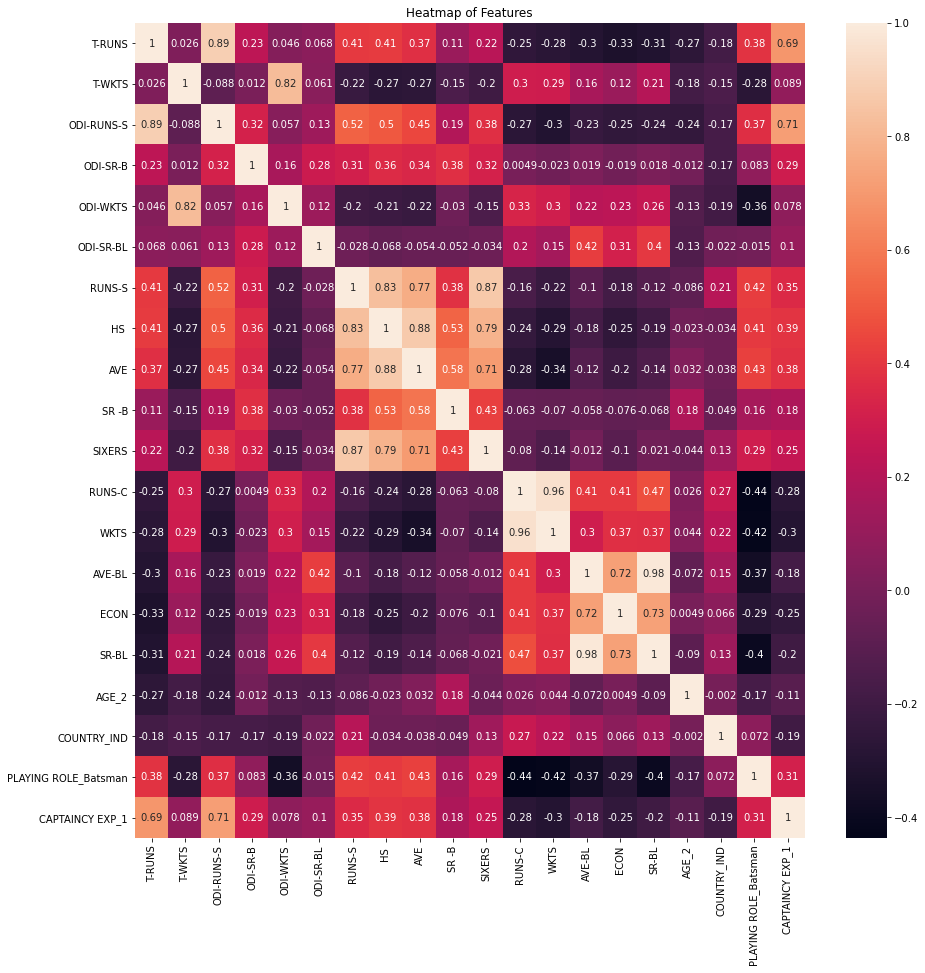

In [24]:
plt.figure(figsize = (15,15))
sns.heatmap(X[large_vif].corr(), annot = True, xticklabels = True, yticklabels=True)
plt.title('Heatmap of Features')

In [25]:
cl_rm = ['T-RUNS','T-WKTS','RUNS-S','HS ','AVE','SR -B','RUNS-C','SR-BL','AGE_2','ODI-RUNS-S','ODI-SR-B','ECON','AVE-BL','SR -B','RUNS-C']

In [26]:
Xnew = []
for column in Xf:
    if column not in cl_rm:
        Xnew.append(column)

In [27]:
vif_fac(X[Xnew])

,column,VIF
0,ODI-WKTS,2.742889
1,ODI-SR-BL,2.822148
2,SIXERS,2.397409
3,WKTS,2.883101
4,AGE_3,1.779861
5,COUNTRY_BAN,1.094293
6,COUNTRY_ENG,1.131869
7,COUNTRY_IND,3.144668
8,COUNTRY_NZ,1.173418
9,COUNTRY_PAK,1.334773


In [28]:
Xnew

['ODI-WKTS',
 'ODI-SR-BL',
 'SIXERS',
 'WKTS',
 'AGE_3',
 'COUNTRY_BAN',
 'COUNTRY_ENG',
 'COUNTRY_IND',
 'COUNTRY_NZ',
 'COUNTRY_PAK',
 'COUNTRY_SA',
 'COUNTRY_SL',
 'COUNTRY_WI',
 'COUNTRY_ZIM',
 'PLAYING ROLE_Batsman',
 'PLAYING ROLE_Bowler',
 'PLAYING ROLE_W. Keeper',
 'CAPTAINCY EXP_1']

In [29]:
Xtrain = Xtrain[Xnew]

In [30]:
Imodel2 = sm.OLS(Ytrain, Xtrain).fit()

In [31]:
Imodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             SOLD PRICE   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.728
Method:                 Least Squares   F-statistic:                              16.49
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    1.13e-20
Time:                        20:10:41   Log-Likelihood:                         -1464.6
No. Observations:                 104   AIC:                                      2965.
Df Residuals:                      86   BIC:                                      3013.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
ODI-WKTS                 772.4088    470.635      1.641      0.104    -163.183    1708.001
ODI-SR-BL                909.0021   1267.497      0.717      0.475   -1610.698    3428.703
SIXERS                  7862.1259   2086.610      3.768      0.000    3714.082     1.2e+04
WKTS                    2431.8988   2105.352      1.155      0.251   -1753.403    6617.201
AGE_3                  -8950.6659    9.8e+04     -0.091      0.927   -2.04e+05    1.86e+05
COUNTRY_BAN            -1.088e+05   3.69e+05     -0.295      0.769   -8.43e+05    6.25e+05
COUNTRY_ENG             6.829e+05   2.16e+05      3.160      0.002    2.53e+05    1.11e+06
COUNTRY_IND             2.828e+05   9.62e+04      2.940      0.004    9.16e+04    4.74e+05
COUNTRY_NZ               1.43e+05   1.52e+05      0.942      0.349   -1.59e+05    4.45e+05
COUNTRY_PAK             1.228e+05    1.6e+05      0.769      0.444   -1.94e+05     4.4e+05
COUNTRY_SA              1.087e+05   1.15e+05      0.945      0.347    -1.2e+05    3.38e+05
COUNTRY_SL              5.591e+04   1.42e+05      0.393      0.695   -2.27e+05    3.39e+05
COUNTRY_WI             -2.223e+04   2.13e+05     -0.104      0.917   -4.46e+05    4.01e+05
COUNTRY_ZIM            -6.798e+04   3.91e+05     -0.174      0.862   -8.45e+05    7.09e+05
PLAYING ROLE_Batsman    1.214e+05   1.07e+05      1.138      0.258   -9.07e+04    3.33e+05
PLAYING ROLE_Bowler    -1.832e+04   1.06e+05     -0.173      0.863   -2.29e+05    1.92e+05
PLAYING ROLE_W. Keeper -5.512e+04    1.7e+05     -0.324      0.746   -3.93e+05    2.83e+05
CAPTAINCY EXP_1         2.084e+05   9.81e+04      2.124      0.037    1.33e+04    4.03e+05
==============================================================================
Omnibus:                        8.635   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                8.345
Skew:                           0.623   Prob(JB):                       0.0154
Kurtosis:                       3.609   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
sig_var=['SIXERS','COUNTRY_ENG','COUNTRY_IND', 'CAPTAINCY EXP_1']

In [33]:
Xtrain = Xtrain[sig_var]

In [34]:
Imodel3=sm.OLS(Ytrain, Xtrain).fit()

In [35]:
Imodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             SOLD PRICE   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.704
Method:                 Least Squares   F-statistic:                              62.77
Date:                Tue, 22 Feb 2022   Prob (F-statistic):                    1.97e-26
Time:                        20:10:42   Log-Likelihood:                         -1476.9
No. Observations:                 104   AIC:                                      2962.
Df Residuals:                     100   BIC:                                      2972.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
SIXERS           8637.8344   1675.131      5.157      0.000    5314.422     1.2e+04
COUNTRY_ENG      7.318e+05   2.14e+05      3.417      0.001    3.07e+05    1.16e+06
COUNTRY_IND      3.879e+05    6.3e+04      6.156      0.000    2.63e+05    5.13e+05
CAPTAINCY EXP_1  3.597e+05   7.49e+04      4.801      0.000    2.11e+05    5.08e+05
==============================================================================
Omnibus:                        1.130   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.568   Jarque-Bera (JB):                0.874
Skew:                           0.223   Prob(JB):                        0.646
Kurtosis:                       3.046   Cond. No.                         165.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
Imodel3.params

SIXERS               8637.834426
COUNTRY_ENG        731833.638616
COUNTRY_IND        387890.253821
CAPTAINCY EXP_1    359725.274051
dtype: float64

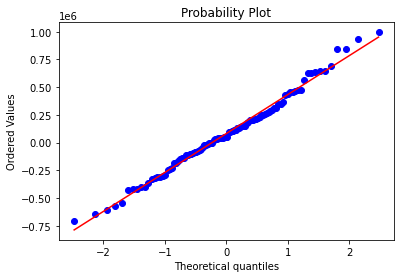

In [37]:
import scipy.stats as st
probplot = st.probplot(Imodel3.resid,plot=plt)

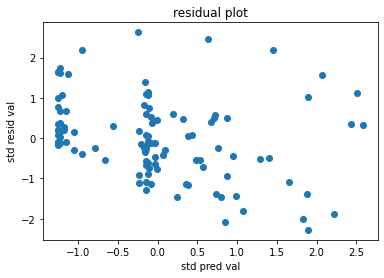

In [38]:
def getstd(vals):
    return (vals - vals.mean())/vals.std()

plt.scatter (getstd(Imodel3.fittedvalues), getstd(Imodel3.resid))
plt.title('residual plot')
plt.xlabel('std pred val')
plt.ylabel('std resid val')
plt.show()

### performance metrics

In [39]:
from sklearn import metrics

In [40]:
pred_y = Imodel3.predict(Xtest[Xtrain.columns])


In [41]:
np.sqrt(metrics.mean_squared_error(pred_y,Ytest))

333693.4147524556

In [42]:
np.round(metrics.r2_score(pred_y, Ytest),4)

0.3058

### Measuring Influential Observations

### influence > 3(K + 1)/N    {Cut off value}

In [44]:
k = Xtrain.shape[1]
n = Xtrain.shape[0]

In [45]:
print('Number of Variables', k, 'and number of observations',n)

Number of Variables 4 and number of observations 104


In [46]:
lev_cut = 3*((k+1)/n)
lev_cut

0.14423076923076925

In [50]:
from statsmodels.graphics.regressionplots import influence_plot

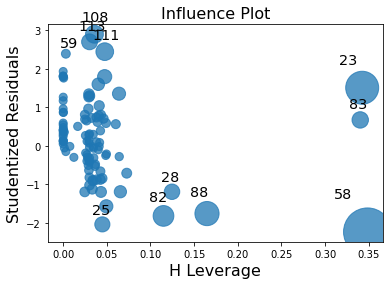

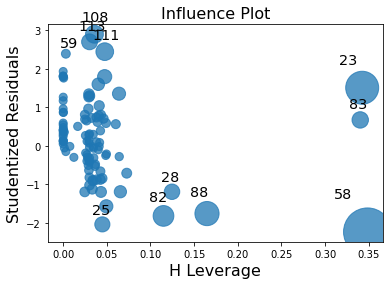

In [97]:
influence_plot(Imodel3)

In [98]:
I.iloc[I.index.isin([23,58,88])]

,AGE,COUNTRY,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,ODI-SR-BL,CAPTAINCY EXP,...,SR -B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,2,ENG,Allrounder,3845,226,3394,88.82,169,33.2,1,...,116.980000,2,105,2,52.500000,9.545455,33.000000,2009,950000,1550000
58,2,ENG,Allrounder,0,0,245,95.33,13,63.2,0,...,101.369863,1,331,19,17.421053,7.012712,14.947368,2011,100000,100000
88,1,IND,Batsman,710,13,3525,92.71,16,61.9,0,...,139.393939,97,678,20,33.900000,7.047817,28.900000,2008,125000,650000


In [99]:
Xtrainnew = Xtrain.drop([23,58,88], axis = 0)
Ytrainnew = Ytrain.drop([23,58,88], axis = 0)

In [100]:
Imodel4 = sm.OLS(Ytrainnew, Xtrainnew).fit()
Imodel4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.710     
Dependent Variable:     SOLD PRICE       AIC:                         2870.9052 
Date:                   2022-02-22 21:50 BIC:                         2881.3656 
No. Observations:       101              Log-Likelihood:              -1431.5   
Df Model:               4                F-statistic:                 62.82     
Df Residuals:           97               Prob (F-statistic):          4.28e-26  
R-squared (uncentered): 0.721            Scale:                       1.2457e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
SIXERS             10029.1011   1770.0111 5.6661 0.0000   6516.1191   13542.0831
COUNTRY_ENG       945392.2638 359288.4466 2.6313 0.0099 232304.1533 1658480.3743
COUNTRY_IND       387924.6265  61366.7462 6.3214 0.0000 266128.6225  509720.6304
CAPTAINCY EXP_1   303734.7027  75592.1328 4.0181 0.0001 153705.2441  453764.1614
--------------------------------------------------------------------------------
Omnibus:                   1.737             Durbin-Watson:                2.206
Prob(Omnibus):             0.420             Jarque-Bera (JB):             1.247
Skew:                      0.250             Prob(JB):                     0.536
Kurtosis:                  3.216             Condition No.:                266  
================================================================================

"""

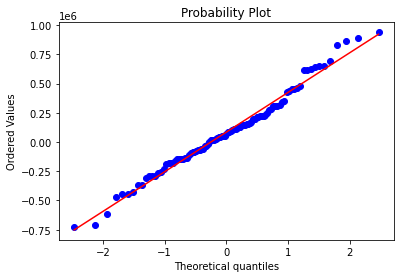

In [101]:
probplot = st.probplot(Imodel4.resid, plot=plt)

In [102]:
predY= Imodel4.predict(Xtest[Xtrainnew.columns])

In [103]:
np.sqrt(metrics.mean_squared_error(predY, Ytest))

344680.47272913647

In [104]:
np.round(metrics.r2_score(predY, Ytest),4)

0.3422

### Outlier Analysis

### Cook's Distance

In [105]:
influence = Imodel4.get_influence()

In [106]:
cooks = influence.cooks_distance
print(cooks)

(array([0.00000000e+00, 5.53553302e-03, 1.34112177e-03, 0.00000000e+00,
       3.36060210e-04, 2.09002666e-03, 3.95909795e-03, 8.25140380e-03,
       5.67796179e-03, 5.74317218e-02, 1.73222649e-05, 4.19770268e-03,
       4.93303252e-04, 2.45834010e-05, 4.48311126e-03, 1.19877535e-03,
       2.06201016e-03, 4.26299583e-04, 0.00000000e+00, 6.92675931e-04,
       1.97137289e-05, 2.06734125e-05, 0.00000000e+00, 5.17908478e-02,
       1.31208109e-05, 8.21799149e-02, 0.00000000e+00, 1.70627955e-04,
       8.52675852e-07, 6.51054036e-03, 4.17954426e-05, 0.00000000e+00,
       3.52655406e-03, 4.64862798e-05, 8.56100643e-04, 6.45367516e-03,
       7.20387135e-03, 8.06453904e-08, 3.62328311e-05, 2.40299721e-05,
       2.94083849e-03, 8.10341472e-04, 4.08597625e-07, 6.44438317e-03,
       3.56619426e-02, 1.79317482e-02, 8.50541957e-03, 1.37744200e-02,
       1.07766475e-05, 6.93462621e-03, 1.28717237e-02, 1.43348099e-02,
       6.55941659e-04, 5.64896330e+00, 2.53102307e-04, 1.41165522e-03,
     

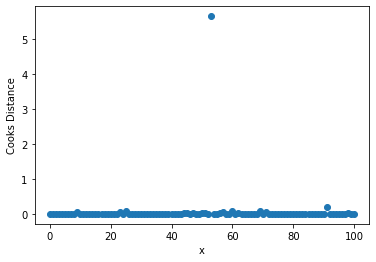

0.041666666666666664


In [107]:
plt.scatter(x=range(0, len(cooks[0])), y=cooks[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

Tcook = 4/(len(cooks[0])-4-1)     # 4/(n-p-1) MLR formula for Cooks Distance
print(Tcook)

In [108]:
highcooks = cooks[0][cooks[0] > Tcook]
highcooks

array([0.05743172, 0.05179085, 0.08217991, 5.6489633 , 0.04213894,
       0.08152872, 0.08041859, 0.0505275 , 0.19739834])

In [109]:
pos= []

for i in highcooks:
    pos.append(np.where(cooks[0]==i))
pos

[(array([9], dtype=int64),),
 (array([23], dtype=int64),),
 (array([25], dtype=int64),),
 (array([53], dtype=int64),),
 (array([57], dtype=int64),),
 (array([60], dtype=int64),),
 (array([69], dtype=int64),),
 (array([71], dtype=int64),),
 (array([91], dtype=int64),)]

In [110]:
Xtrainnew[Xtrainnew.index.isin([53,91])]

,SIXERS,COUNTRY_ENG,COUNTRY_IND,CAPTAINCY EXP_1
53,1,0,0,0
91,27,0,0,1


In [111]:
Xtrainnewcook = Xtrainnew.drop([53,91], axis = 0)
Ytrainnewcook = Ytrainnew.drop([53,91], axis = 0)

In [112]:
Imodel5 = sm.OLS(Ytrainnewcook, Xtrainnewcook).fit()
Imodel5.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.707     
Dependent Variable:     SOLD PRICE       AIC:                         2815.9215 
Date:                   2022-02-22 21:50 BIC:                         2826.3020 
No. Observations:       99               Log-Likelihood:              -1404.0   
Df Model:               4                F-statistic:                 60.75     
Df Residuals:           95               Prob (F-statistic):          2.31e-25  
R-squared (uncentered): 0.719            Scale:                       1.2684e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
SIXERS             10007.3766   1786.8488 5.6006 0.0000   6460.0332   13554.7201
COUNTRY_ENG       950054.3668 362781.4026 2.6188 0.0103 229842.2234 1670266.5103
COUNTRY_IND       389184.8594  62016.7094 6.2755 0.0000 266066.1249  512303.5940
CAPTAINCY EXP_1   299724.3339  77122.1292 3.8864 0.0002 146617.5494  452831.1183
--------------------------------------------------------------------------------
Omnibus:                   1.635             Durbin-Watson:                2.203
Prob(Omnibus):             0.442             Jarque-Bera (JB):             1.201
Skew:                      0.258             Prob(JB):                     0.549
Kurtosis:                  3.159             Condition No.:                265  
================================================================================

"""

### Performance Metrics

In [114]:
predY = Imodel5.predict(Xtest[Xtrainnew.columns])

In [115]:
np.sqrt(metrics.mean_squared_error(predY, Ytest))

344119.90223311645

In [116]:
np.round(metrics.r2_score(predY, Ytest),4)

0.3408

### transforming responce variable

In [117]:
Ytrainnewcook = np.sqrt(Ytrainnewcook)

In [118]:
Imodel6 = sm.OLS(Ytrainnewcook, Xtrainnewcook).fit()
Imodel6.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.737     
Dependent Variable:     SOLD PRICE       AIC:                         1455.0996 
Date:                   2022-02-22 21:54 BIC:                         1465.4800 
No. Observations:       99               Log-Likelihood:              -723.55   
Df Model:               4                F-statistic:                 70.39     
Df Residuals:           95               Prob (F-statistic):          1.42e-27  
R-squared (uncentered): 0.748            Scale:                       1.3602e+05
----------------------------------------------------------------------------------
                      Coef.     Std.Err.     t      P>|t|      [0.025      0.975] 
----------------------------------------------------------------------------------
SIXERS                 9.6919     1.8503   5.2379   0.0000      6.0185     13.3653
COUNTRY_ENG          580.6998   375.6725   1.5458   0.1255   -165.1044   1326.5039
COUNTRY_IND          491.0117    64.2204   7.6457   0.0000    363.5181    618.5053
CAPTAINCY EXP_1      373.5330    79.8626   4.6772   0.0000    214.9857    532.0802
--------------------------------------------------------------------------------
Omnibus:                    0.013             Durbin-Watson:               1.898
Prob(Omnibus):              0.994             Jarque-Bera (JB):            0.047
Skew:                       -0.016            Prob(JB):                    0.977
Kurtosis:                   2.899             Condition No.:               265  
================================================================================

"""

### Performance Metrics

In [119]:
pred_y = np.power(Imodel6.predict(Xtest[Xtrainnewcook.columns]),2)

In [120]:
np.sqrt(metrics.mean_squared_error(pred_y, Ytest))

556273.5268619836

In [121]:
np.round(metrics.r2_score(pred_y, Ytest),4)

0.4251

The presence of auto-correlation can be established using the Durbin−Watson test. 
As a thumb rule, a Durbin−Watson statistic close to 2 would
imply the absence of autocorrelation. The model summary shows that the
Durbin−Watson statistics value is 1.9, which is less than 2; hence it can be concluded 
that the error terms are not auto-correlated. Note that auto-correlation is more
relevant in the case of time-series data.
